In [18]:
!git clone https://github.com/Jakij4ki/yelp-sentiment-analysis.git
%cd yelp-sentiment-analysis

Cloning into 'yelp-sentiment-analysis'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 5.38 KiB | 324.00 KiB/s, done.
/content/yelp-sentiment-analysis/yelp-sentiment-analysis


In [19]:
!mkdir -p EDA

In [20]:
!cp /content/Percobaan EDA.ipnyb EDA/

cp: cannot stat '/content/Percobaan': No such file or directory
cp: cannot stat 'EDA.ipnyb': No such file or directory


In [17]:
!git config --global user.email "dzakyrezandi1714@gmail.com"
!git config --global user.name "Jakij4ki"

In [16]:
!git add EDA/Percobaan EDA.ipnyb

In [ ]:
!git commit -m "Percobaan EDA dengan melihat data tiap label pada keseluruhan data yelp"

In [ ]:
!git push origin main

In [1]:
!pip install modin[ray]  # atau modin[dask]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.2 MB/s eta 0:00:00


In [2]:
import modin.pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/dataset/data transform.parquet"
df = pd.read_parquet(path)

2025-10-04 16:01:16,898	INFO worker.py:1951 -- Started a local Ray instance.


In [4]:
print(df.head(5))

                  date                                               text  \
0  2018-07-07 22:09:11  If you decide to eat here, just be aware it is...   
1  2014-02-05 20:30:30  Family diner. Had the buffet. Eclectic assortm...   
2  2015-01-04 00:01:03  Wow!  Yummy, different,  delicious.   Our favo...   
3  2017-01-14 20:54:15  Cute interior and owner (?) gave us tour of up...   
4  2015-09-23 23:10:31  I am a long term frequent customer of this est...   

           city state  review_stars  sentiment sentiment_label  
0   North Wales    PA           3.0          1         Neutral  
1        Tucson    AZ           3.0          1         Neutral  
2  Philadelphia    PA           5.0          2        Positive  
3   New Orleans    LA           4.0          2        Positive  
4  Philadelphia    PA           1.0          0        Negative  


In [5]:
sentiment_counts = df["sentiment_label"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]
print(sentiment_counts)

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


  Sentiment    Count
0  Positive  3209836
1  Negative   971722
2   Neutral   543126


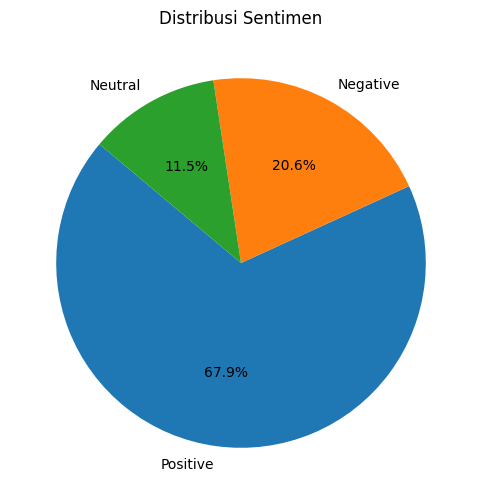

In [6]:
import matplotlib.pyplot as plt

counts = df["sentiment_label"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribusi Sentimen")
plt.show()